In [ ]:
!pip install python-docx
!pip install -U mosestokenizer

Requirement already up-to-date: mosestokenizer in /usr/local/lib/python3.6/dist-packages (1.1.0)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import re
import pandas as pd
import docx
import torch
from mosestokenizer import *
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import seaborn as sns
from tqdm import tqdm
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# Read data

In [ ]:
# all paragraphs
data = []

In [ ]:
#docx document
for dirname, _, filenames in os.walk('/content/drive/MyDrive/demetre_{pipia, uridia}/data/წიგნები/'):
    for filename in filenames:
        filepath = os.path.join(dirname, filename)
        ext = os.path.splitext(filename)[1]
        try:
            if ext == ".docx":
                doc = docx.Document(filepath)
                doc.paragraphs
                for par in doc.paragraphs:
                    data += par.text.split("\n\n")
        except:
            pass
len(data)

392274

In [ ]:
# read wikipedia dump
with open('/content/drive/MyDrive/demetre_{pipia, uridia}/data/wiki_final') as f:
    for line in f:
        data.append(line.strip())
len(data)

1234263

In [ ]:
# read oscar data (more info -> https://oscar-corpus.com/ )
with open('/content/drive/MyDrive/demetre_{pipia, uridia}/data/ka_part_1.txt') as f:
    for line in f:
        data.append(line.strip())
    
with open('/content/drive/MyDrive/demetre_{pipia, uridia}/data/ka_part_2.txt') as f:
    for line in f:
        data.append(line.strip())
len(data)

6612263

#Filter data

In [ ]:
georgian = ['ა', 'ბ', 'გ', 'დ', 'ე', 'ვ', 'ზ', 'თ', 'ი', 'კ', 'ლ', 'მ', 'ნ', 'ო', 'პ', 'ჟ', 'რ', 
            'ს', 'ტ', 'უ', 'ფ', 'ქ', 'ღ', 'ყ', 'შ', 'ჩ', 'ც', 'ძ', 'წ', 'ჭ', 'ხ', 'ჯ', 'ჰ']

moses_tokenizer = MosesTokenizer()
pattern = '|'.join(georgian)
pattern = f"({pattern}|\.|,|\?|!|[0-9])+"

def tokenizer(s):
    tokens = moses_tokenizer(s) # tokenize
    res = []
    # filter words
    for token in tokens:
        if bool(re.match(pattern, token)):  # remove every non georgian word
            res.append(token)
    return res

tokenizer('რადად დასდსა და 432ს 3..? 324 dasdsafa sdda?? &gt;')

['რადად', 'დასდსა', 'და', '432ს', '3', '..', '?', '324', '?', '?']

In [ ]:
def filter_data(l):
    filtered = []
    for i, s in enumerate(l):
        if i % 1000000 == 0:
            # to see progress
            print(f"Iter {i} out of {len(l)}")
        length = len(s.split())
        if length < 5 or length > 500: continue # if sentence is too small or too big (should be in range of [5:500]) those are not useful
       
        s = re.sub(r'\([^()]*\)', '', s) # remove () 
        s = re.sub(r'\s+', ' ', s) # sub tabs and and lines with space
        s = re.sub(r'(;|:|\.+)', '.', s) # sub ; and : with .
        
        s = ' '.join(tokenizer(s)) # tokenize, remove foreign words and put back into sentence
        mx = max([len(w) for w in s.split()]) if len(s.split()) > 0 else 0 #length of longest word need to be less than 20, otherwise there is error in data
        tf = pd.value_counts(s.split(" "))[0] / len(s.split(" ")) # most popular term frequence need to be less than 0.3
        
        if tf < 0.3 and mx < 20:
            filtered.append(s)
    return filtered


filter_data(['დასდას დ(დს.დსდს.) d\td დ\n\nდა. დასდსად; დსასდსად: დსადსად (დსადსადსადა)', 
             'dasdasdsa asd dsa dsad ad dsad sad sadsa dsa das', 
             'ძააან მაგარი გუნდია რა ეს რეალი', 'ა, ა, ა, ბბბბბბბბბბბ, ბბბბბბბბბბბბბ, ცცცცცცცცცც, დდდ, ბ, ჭ, ც, დ, ჭ',
             'რატო მოხდა ვითომ ეს ამბავი რავიცი აბა...'])


Iter 0 out of 5


['ძააან მაგარი გუნდია რა ეს რეალი', 'რატო მოხდა ვითომ ეს ამბავი რავიცი აბა .']

In [ ]:
#filter all unnecessary data
filtered_data = filter_data(data)
len(filtered_data)

Iter 0 out of 6612263
Iter 100000 out of 6612263
Iter 200000 out of 6612263
Iter 300000 out of 6612263
Iter 400000 out of 6612263
Iter 500000 out of 6612263
Iter 600000 out of 6612263
Iter 700000 out of 6612263
Iter 800000 out of 6612263
Iter 900000 out of 6612263
Iter 1000000 out of 6612263
Iter 1100000 out of 6612263
Iter 1200000 out of 6612263
Iter 1300000 out of 6612263
Iter 1400000 out of 6612263
Iter 1500000 out of 6612263
Iter 1600000 out of 6612263
Iter 1700000 out of 6612263
Iter 1800000 out of 6612263
Iter 1900000 out of 6612263
Iter 2000000 out of 6612263
Iter 2100000 out of 6612263
Iter 2200000 out of 6612263
Iter 2300000 out of 6612263
Iter 2400000 out of 6612263
Iter 2500000 out of 6612263
Iter 2600000 out of 6612263
Iter 2700000 out of 6612263
Iter 2800000 out of 6612263
Iter 2900000 out of 6612263
Iter 3000000 out of 6612263
Iter 3100000 out of 6612263
Iter 3200000 out of 6612263
Iter 3300000 out of 6612263
Iter 3400000 out of 6612263
Iter 3500000 out of 6612263
Iter 36

5824410

# Store into drive

In [ ]:
df = pd.DataFrame({"Paragraph": filtered_data})
df = df.sample(frac=1) # shuffle
df.head()

,Paragraph
2709195,"რა თქმა უნდა , ბევრი საინტერესო , ჭკვიანი , კა..."
641260,მზის შთამომავლები 2016 წლის სამხრეთ კორეული ტე...
1612068,"ახლაც მესმის მსახიობ ჟანრი ლოლაშვილის ხმა , ახ..."
3310685,აღმოსავლეთ ევროპის ინსტიტუტში ელიტური კორუფციი...
4625714,"დაავადების სიმძიმისა და ხასიათის მიხედვით , ნე..."


In [ ]:
# save to csv
# df.to_csv("/content/drive/MyDrive/demetre_{pipia, uridia}/data/paragraph_all_only_georgian_shuffled.csv", index=False)

# Data analysis

In [ ]:
# read already filtered data
df = pd.read_csv('/content/drive/MyDrive/demetre_{pipia, uridia}/data/paragraph_all_only_georgian_shuffled.csv', lineterminator='\n')
df.head()

,Paragraph
0,"რა თქმა უნდა , ბევრი საინტერესო , ჭკვიანი , კა..."
1,მზის შთამომავლები 2016 წლის სამხრეთ კორეული ტე...
2,"ახლაც მესმის მსახიობ ჟანრი ლოლაშვილის ხმა , ახ..."
3,აღმოსავლეთ ევროპის ინსტიტუტში ელიტური კორუფციი...
4,"დაავადების სიმძიმისა და ხასიათის მიხედვით , ნე..."


Text(0.5, 1.0, 'Paragraph Lengths')

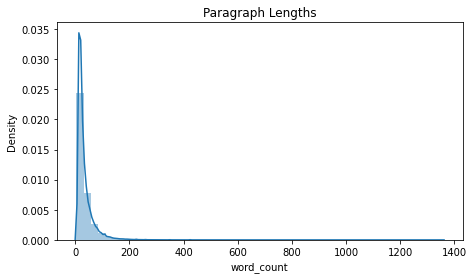

In [ ]:
# Average Paragraphs lengths 
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)

df['word_count'] = df['Paragraph'].apply(lambda x: len(str(x).split(" ")))

sns.distplot(df['word_count']).set_title('Paragraph Lengths')

As we can see most of the paragraphs length is less than 200, which is kind of expectable. 

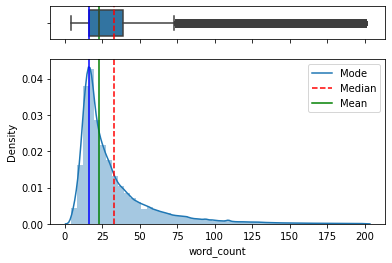

In [ ]:
tmp_df = df.loc[df['word_count'] <= 200]

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=tmp_df['word_count'].mean()
median=tmp_df['word_count'].median()
mode=tmp_df['word_count'].mode().tolist()[0]

sns.boxplot(tmp_df["word_count"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(tmp_df["word_count"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mode':mode, 'Median':median, 'Mean':mean})

ax_box.set(xlabel='')
plt.show()

We saw from previous graph that most of the sentences have word length less than 200, so for this graph ignore all huge paragraphs and just saw regular ones, which makes easier to see difference between mode, median and mean, which we can say that is not too much. Mode is around 20, mean is about 24 and median is around 35.

Text(0.5, 1.0, 'Paragraph Lenghts (Characters)')

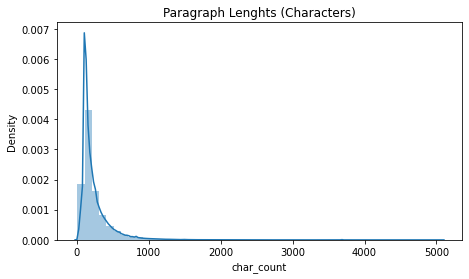

In [ ]:
# Average Paragraphs lengths (Characters)
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)

df['char_count'] = df['Paragraph'].apply(lambda x: len(str(x)))

sns.distplot(df['char_count']).set_title('Paragraph Lengths (Characters)')

Paragraph word lengths and character lengths have pretty much simmilar distribution which is a good sign that data is well balanced.

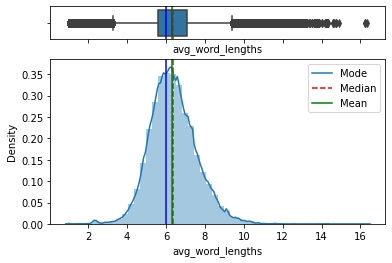

In [ ]:
# Average Word lengths in Paragraphs
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['avg_word_lengths'] = df['Paragraph'].apply(lambda x: avg_word(x))

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['avg_word_lengths'].mean()
median=df['avg_word_lengths'].median()
mode=df['avg_word_lengths'].mode().tolist()[0]

sns.boxplot(df["avg_word_lengths"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(df["avg_word_lengths"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mode':mode, 'Median':median, 'Mean':mean})

Mode, Median and Mean are almost the same, about 6, which is kind of expectable in georgian language. Another proof that data is well balanced.

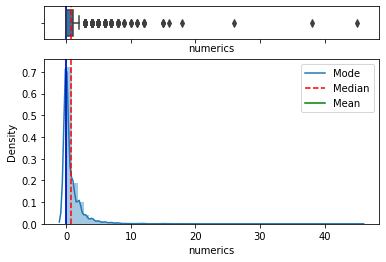

In [ ]:
df['numerics'] = df['Paragraph'][:4000].apply(lambda x: len([x for x in x.split() if x.isdigit()]))


f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['numerics'].mean()
median=df['numerics'].median()
mode=df['numerics'].mode().tolist()[0]

sns.boxplot(df["numerics"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(df["numerics"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mode':mode, 'Median':median, 'Mean':mean})

We can see that numeric values are rear in the text. Mode, Median and Mean all of them are between 0 and 1

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
sent_tokenize('dsadsa. dsada.d dsadsa')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['dsadsa.', 'dsada.d dsadsa']

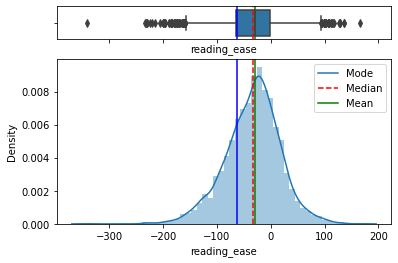

In [ ]:
# Average Word lengths in Paragraphs
moses_tokenizer = MosesTokenizer()
syllables = ['ა', 'ე', 'ი', 'ო', 'უ']
def reading_ease(par):
    total_words = len(moses_tokenizer(par))
    total_sentences = len(sent_tokenize(par))
    pattern = '|'.join(syllables)
    total_syllables = len(re.findall(pattern, par))
    return 206.835 - 1.015 * total_words / total_sentences - 84.6 * total_syllables / total_words

df['reading_ease'] = df['Paragraph'][:4000].apply(lambda x: reading_ease(x))

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['reading_ease'].mean()
median=df['reading_ease'].median()
mode=df['reading_ease'].mode().tolist()[0]

sns.boxplot(df["reading_ease"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(df["reading_ease"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mode':mode, 'Median':median, 'Mean':mean})

Seems like our data is pretty complicated because, mean, mode and median all of them are negative. And easily readable sentences are much more rare. 
for more information see -> https://simple.wikipedia.org/wiki/Flesch_Reading_Ease

Top 20 words not including stop words. 

See georgian stop words -> https://raw.githubusercontent.com/rudolferemyan/georgian_nlp/master/stop_words/GEORGIAN_STOP_WORDS_LIST.txt

In [ ]:
# Read georgian stopwords
stop_words = list(pd.read_csv("https://raw.githubusercontent.com/rudolferemyan/georgian_nlp/master/stop_words/GEORGIAN_STOP_WORDS_LIST.txt", header=None, nrows = 224).values.flatten())

from sklearn.feature_extraction.text import TfidfVectorizer

length = 4000
# Fit TF-IDF vectorizer
tfidf = TfidfVectorizer(min_df=0.005, stop_words=stop_words)
tfidf.fit(df.Paragraph[:length]);

# transform nos_df article text to tfidf vectors
tfidf_vect = tfidf.transform(df.Paragraph[:length])

# Store dataframe
tfidf_df = pd.DataFrame(tfidf_vect.toarray(), columns=tfidf.get_feature_names())

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ერთ', 'ერთად', 'ერთი', 'თავის', 'მიუხედავად', 'მიხედვით', 'მხრივ', 'ნაცვლად', 'პასუხად'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


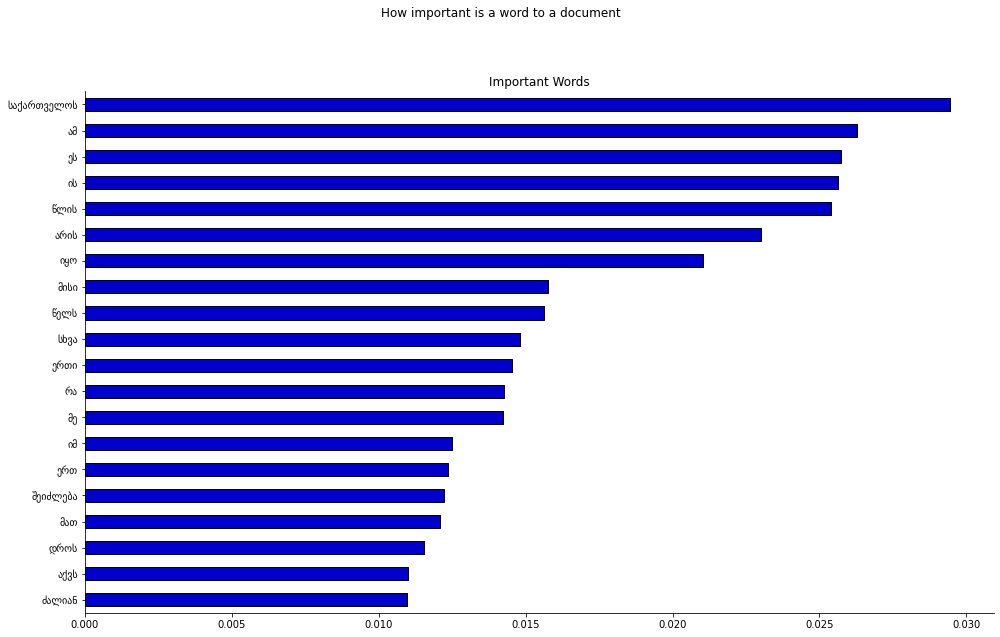

In [ ]:
# Initialize plots
fig, axes = plt.subplots(1, 1, figsize=(14, 8), sharex=True)

# Sort words by hight TF-IDF mean and by category
top = tfidf_df.mean().sort_values().tail(20)

# Bar plot most imporant words for every category
top.plot(kind="barh", title='Important Words', color="mediumblue", edgecolor="k")

# Plot meta data
fig.suptitle("How important is a word to a document", y=1.1)
fig.tight_layout()

sns.despine()